In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [2]:
df = pd.read_csv('The Goldman Sachs.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,94.1875,94.3750,87.750,88.3125,65.690536,1822600
1,2000-01-04,87.0000,87.5000,82.250,82.7500,61.552921,1647700
2,2000-01-05,80.8750,81.8750,78.375,78.8750,58.670509,1516600
3,2000-01-06,78.6250,84.5000,78.625,82.2500,61.180992,1845100
4,2000-01-07,83.0625,83.1875,79.875,82.5625,61.413429,1127400


In [12]:
print(f'The dataset has a shape of {df.shape}', '\n')
print(f'The dataset has {df.isnull().sum().sum()} missing values', '\n')
print(f'The dataset has {df.duplicated().sum()} duplicates', '\n')

The dataset has a shape of (5863, 7) 

The dataset has 0 missing values 

The dataset has 0 duplicates 



# Exploratory Data Analysis

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5863 entries, 0 to 5862
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5863 non-null   object 
 1   Open       5863 non-null   float64
 2   High       5863 non-null   float64
 3   Low        5863 non-null   float64
 4   Close      5863 non-null   float64
 5   Adj Close  5863 non-null   float64
 6   Volume     5863 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 320.8+ KB


### ACF - Auto Correlation Function

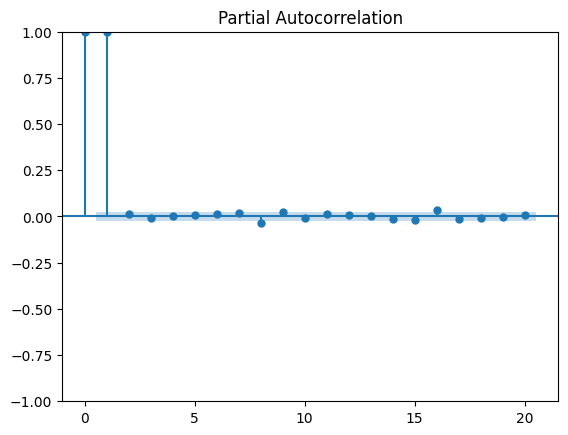

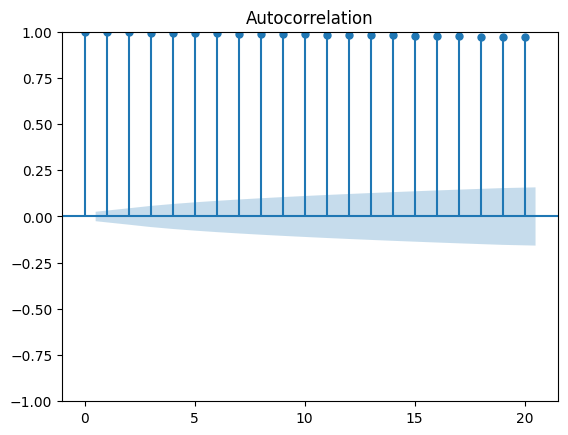

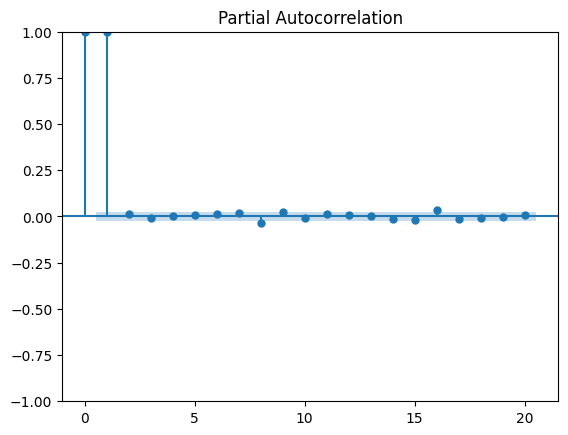

In [14]:
# Plot ACF
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df['Close'], lags=20, alpha=0.05)

# Plot PACF
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df['Close'], lags=20, alpha=0.05)

### Opening & Closing Prices

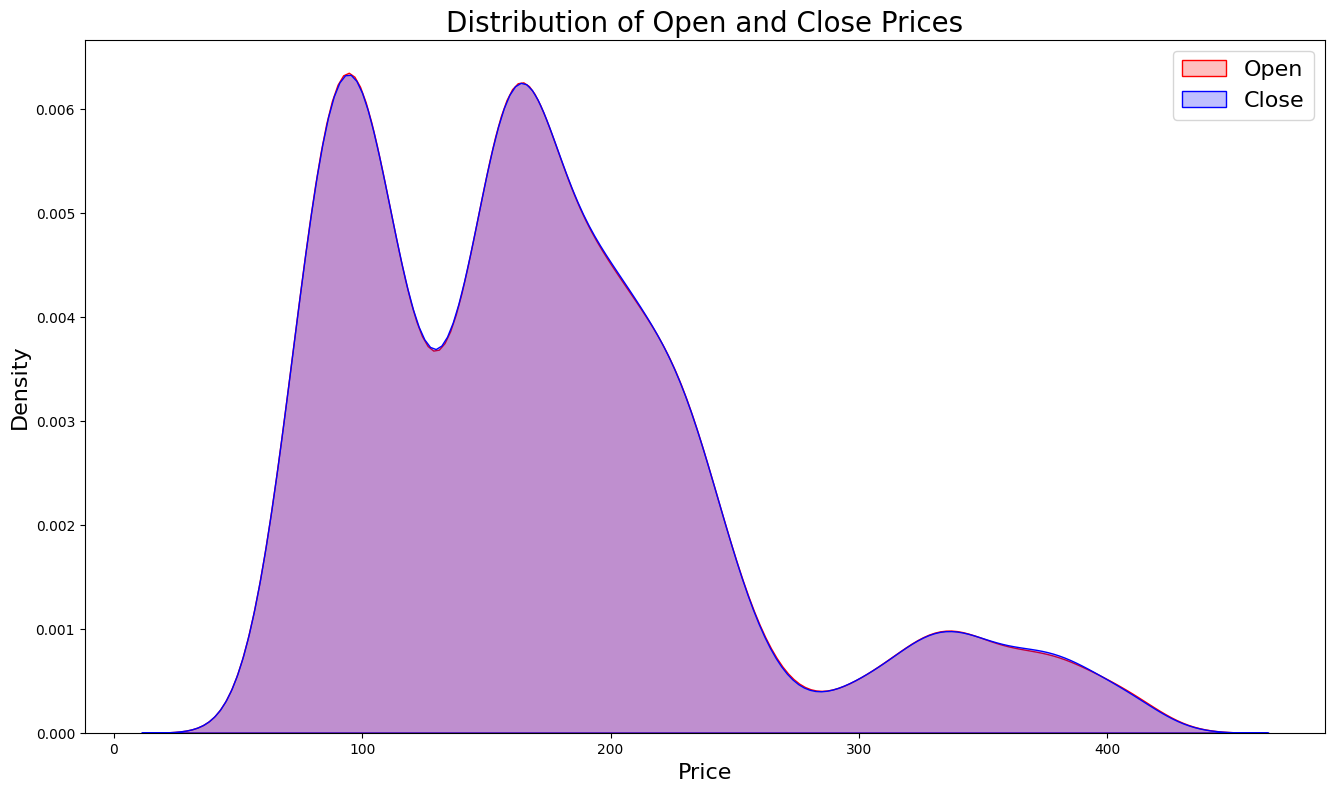

In [15]:
plt.figure(figsize=(16, 9))
sns.kdeplot(df['Open'], shade=True, color='r')
sns.kdeplot(df['Close'], shade=True, color='b')
plt.title('Distribution of Open and Close Prices', fontsize=20)
plt.xlabel('Price', fontsize=16)
plt.ylabel('Density', fontsize=16)
plt.legend(['Open', 'Close'], fontsize=16)
plt.show();

C:\Users\Administrator\AppData\Local\Temp\ipykernel_2844\2536331698.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


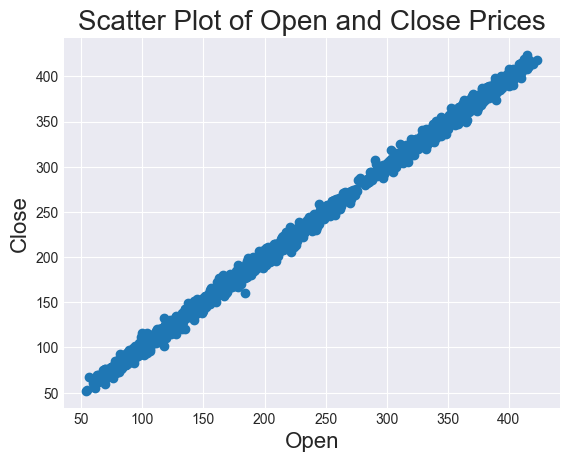

In [16]:
# Scatter plot
plt.style.use('seaborn-darkgrid')
plt.scatter(df['Open'], df['Close'])
plt.title('Scatter Plot of Open and Close Prices', fontsize=20)
plt.xlabel('Open', fontsize=16)
plt.ylabel('Close', fontsize=16)
plt.show();

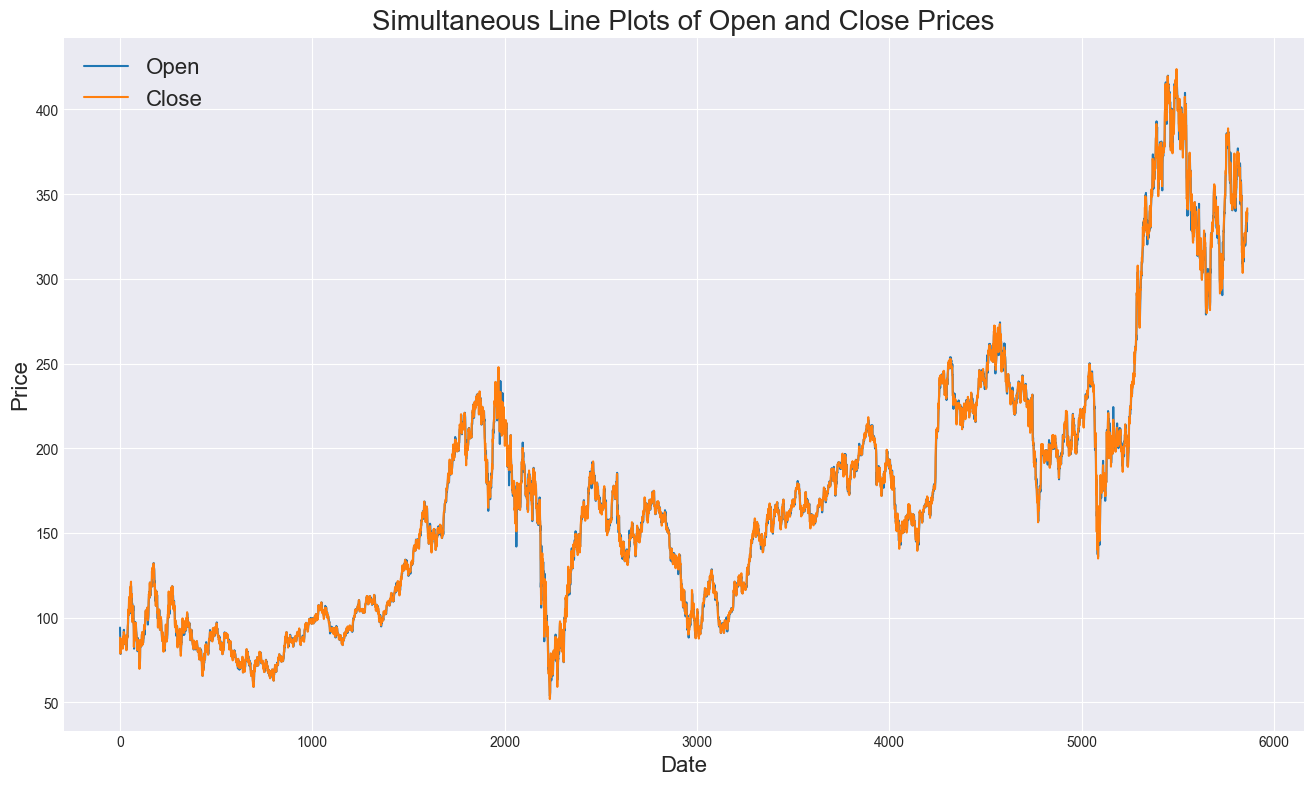

In [17]:
# Simultaneous line plots of Open and Close prices
df['Open'].plot(figsize=(16, 9))
df['Close'].plot(figsize=(16, 9))
plt.title('Simultaneous Line Plots of Open and Close Prices', fontsize=20)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Price', fontsize=16)
plt.legend(['Open', 'Close'], fontsize=16)
plt.show();

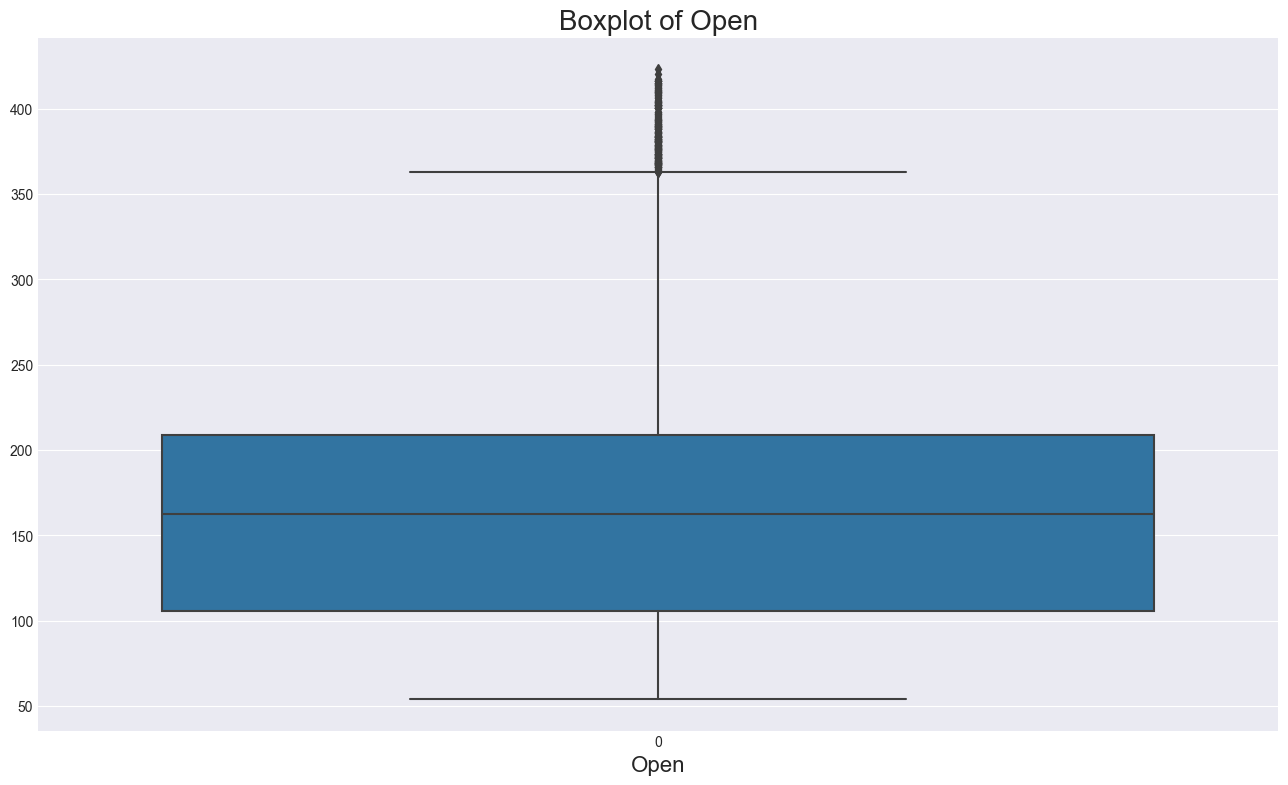

In [20]:
# Boxplot of open
plt.figure(figsize=(16, 9))
sns.boxplot(df['Open'])
plt.title('Boxplot of Open', fontsize=20)
plt.xlabel('Open', fontsize=16)
plt.show();

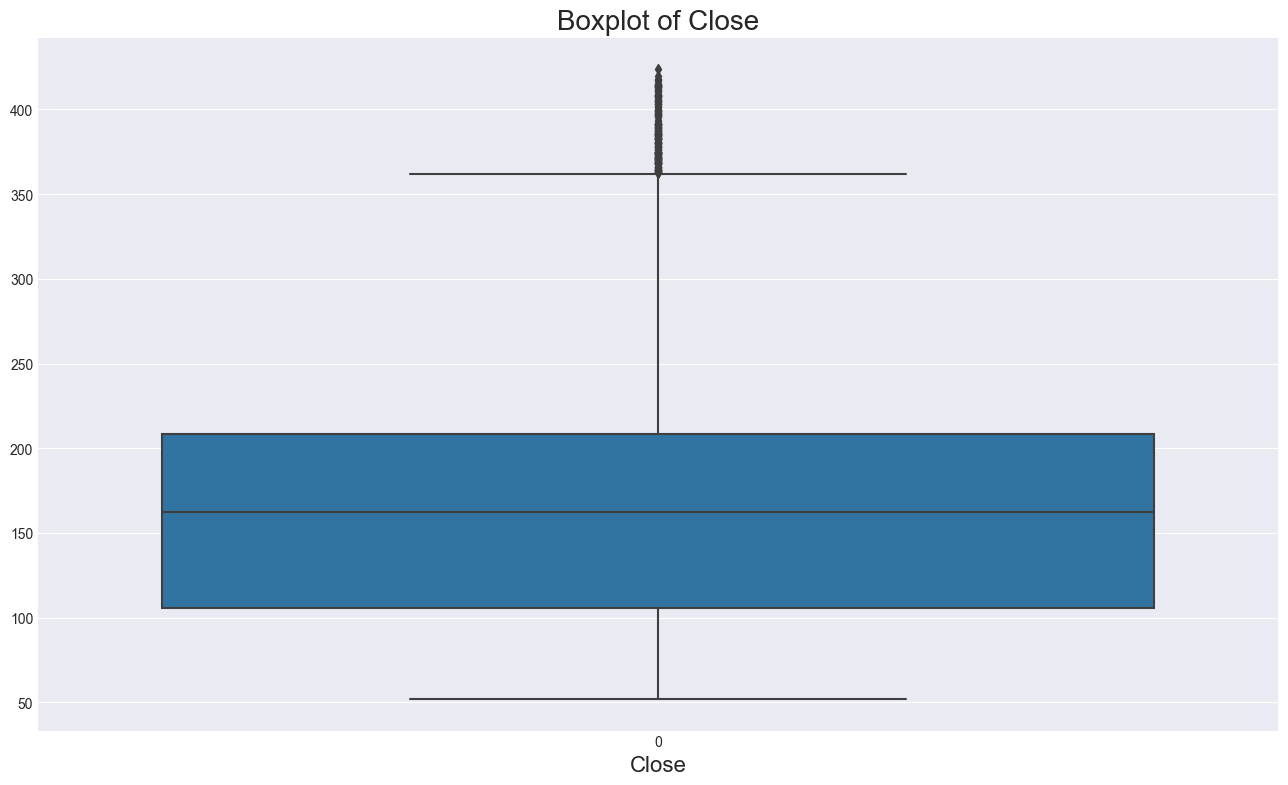

In [21]:
# Boxplot of close
plt.figure(figsize=(16, 9))
sns.boxplot(df['Close'])
plt.title('Boxplot of Close', fontsize=20)
plt.xlabel('Close', fontsize=16)
plt.show();

### High & Low Prices

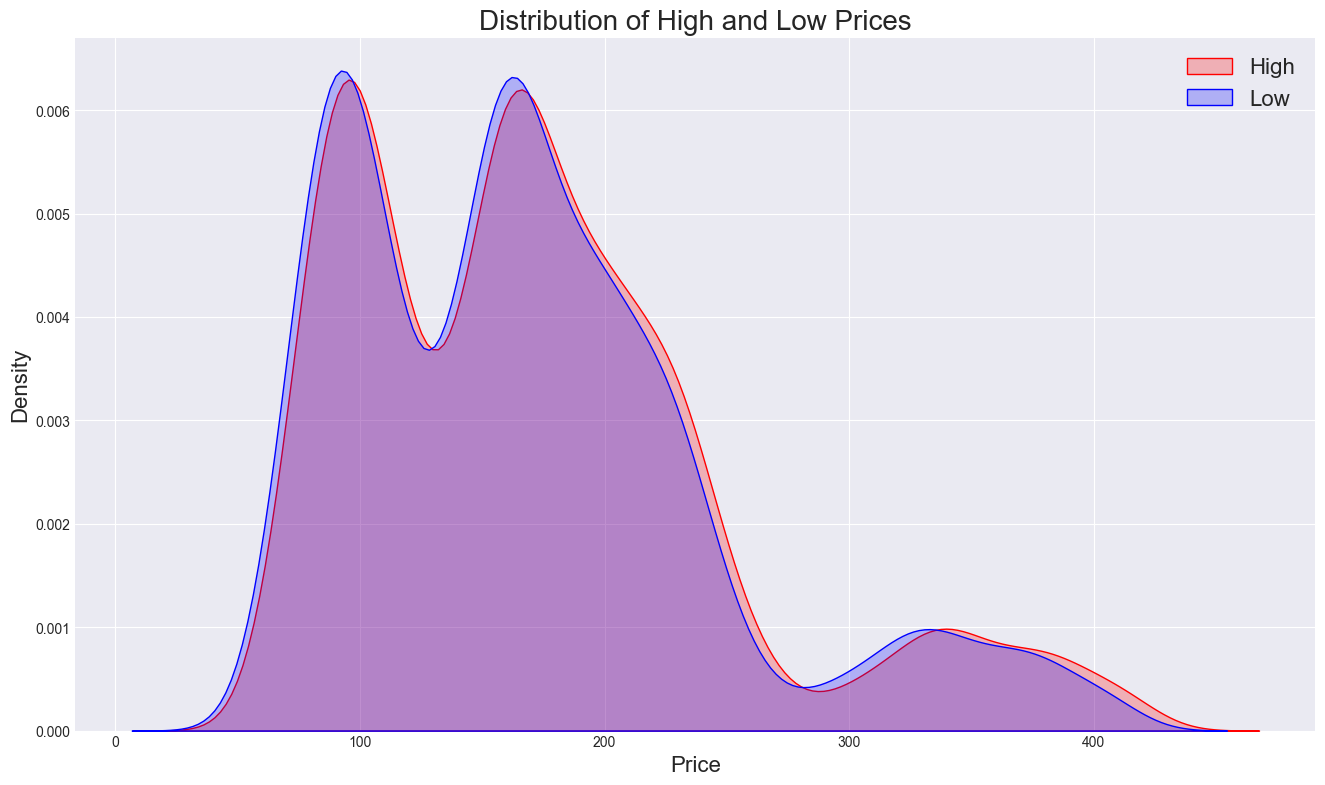

In [22]:
# KDE (Kernel Density Estimate) plot of both high and low
f, ax = plt.subplots(figsize=(16, 9))
sns.kdeplot(df['High'], shade=True, color='r')
sns.kdeplot(df['Low'], shade=True, color='b')
plt.title('Distribution of High and Low Prices', fontsize=20)
plt.xlabel('Price', fontsize=16)
plt.ylabel('Density', fontsize=16)
plt.legend(['High', 'Low'], fontsize=16)
plt.show();

* Alternatively...

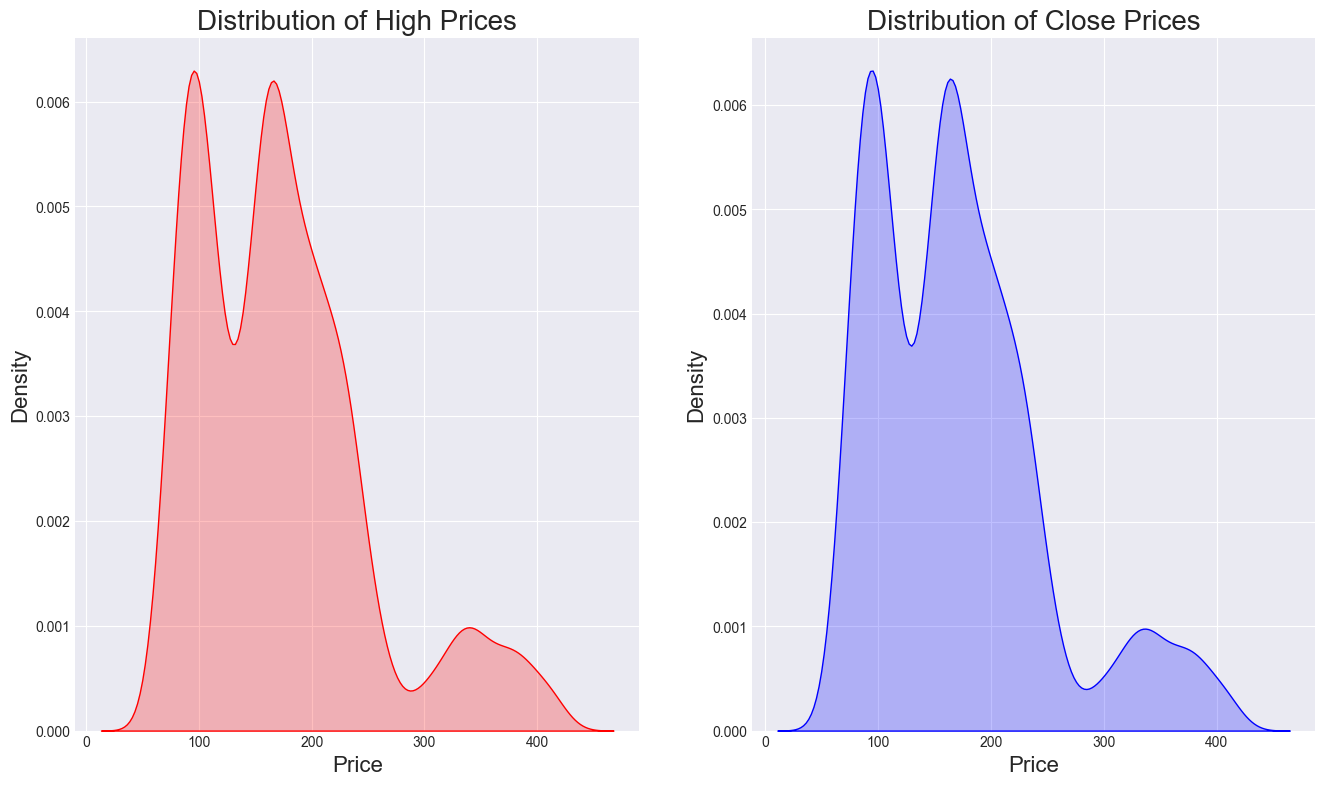

In [23]:
# Plot the kde plots of high and close but different axes
f, ax = plt.subplots(1, 2, figsize=(16, 9))
sns.kdeplot(df['High'], shade=True, color='r', ax=ax[0])
sns.kdeplot(df['Close'], shade=True, color='b', ax=ax[1])
ax[0].set_title('Distribution of High Prices', fontsize=20)
ax[0].set_xlabel('Price', fontsize=16)
ax[0].set_ylabel('Density', fontsize=16)
ax[1].set_title('Distribution of Close Prices', fontsize=20)
ax[1].set_xlabel('Price', fontsize=16)
ax[1].set_ylabel('Density', fontsize=16)
plt.show();

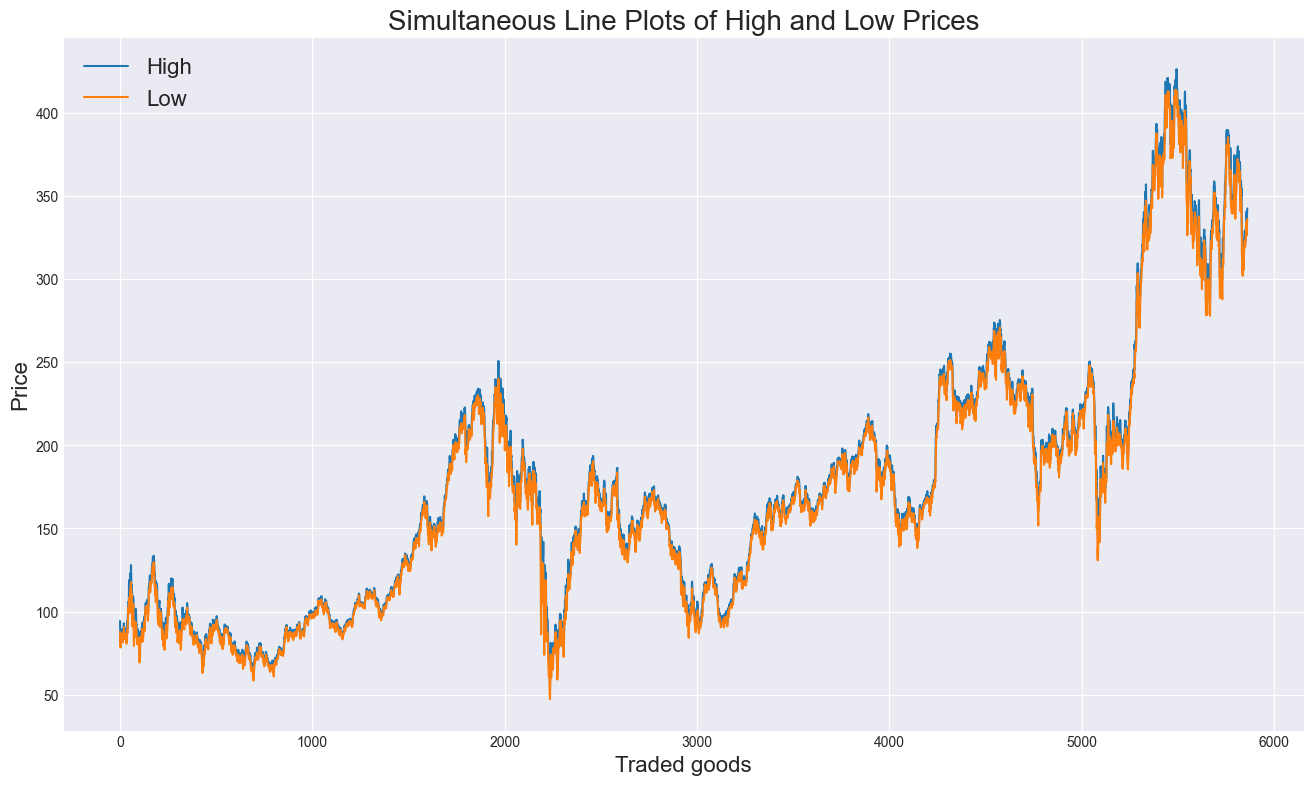

In [24]:
# Simultaneous line plots of high and low prices
df['High'].plot(figsize=(16, 9))
df['Low'].plot(figsize=(16, 9))
plt.title('Simultaneous Line Plots of High and Low Prices', fontsize=20)
plt.xlabel('Traded goods', fontsize=16)
plt.ylabel('Price', fontsize=16)
plt.legend(['High', 'Low'], fontsize=16)
plt.show();

* Just like the opening anc closing prices, the high and low prices are also highly correlated with each other.

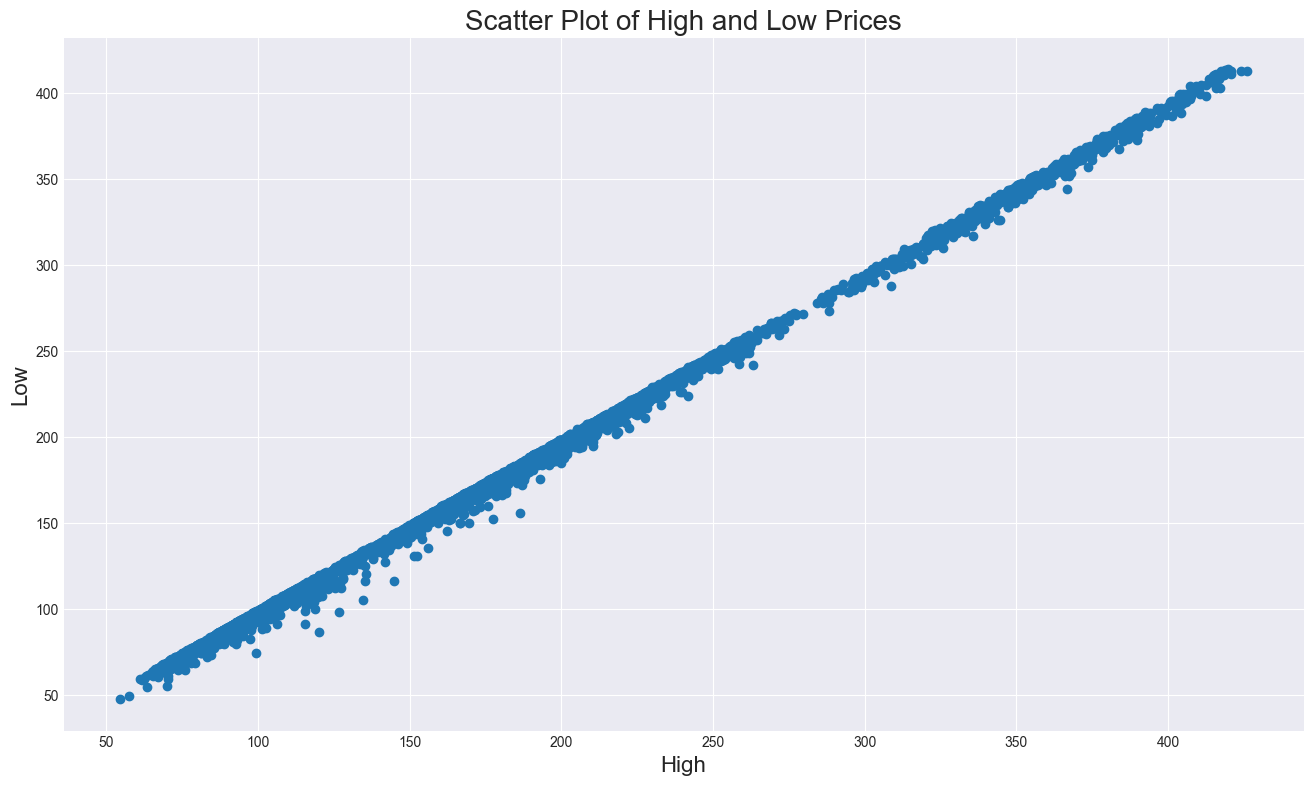

In [25]:
plt.figure(figsize=(16, 9))
plt.scatter(df['High'], df['Low'])
plt.title('Scatter Plot of High and Low Prices', fontsize=20)
plt.xlabel('High', fontsize=16)
plt.ylabel('Low', fontsize=16)
plt.show();

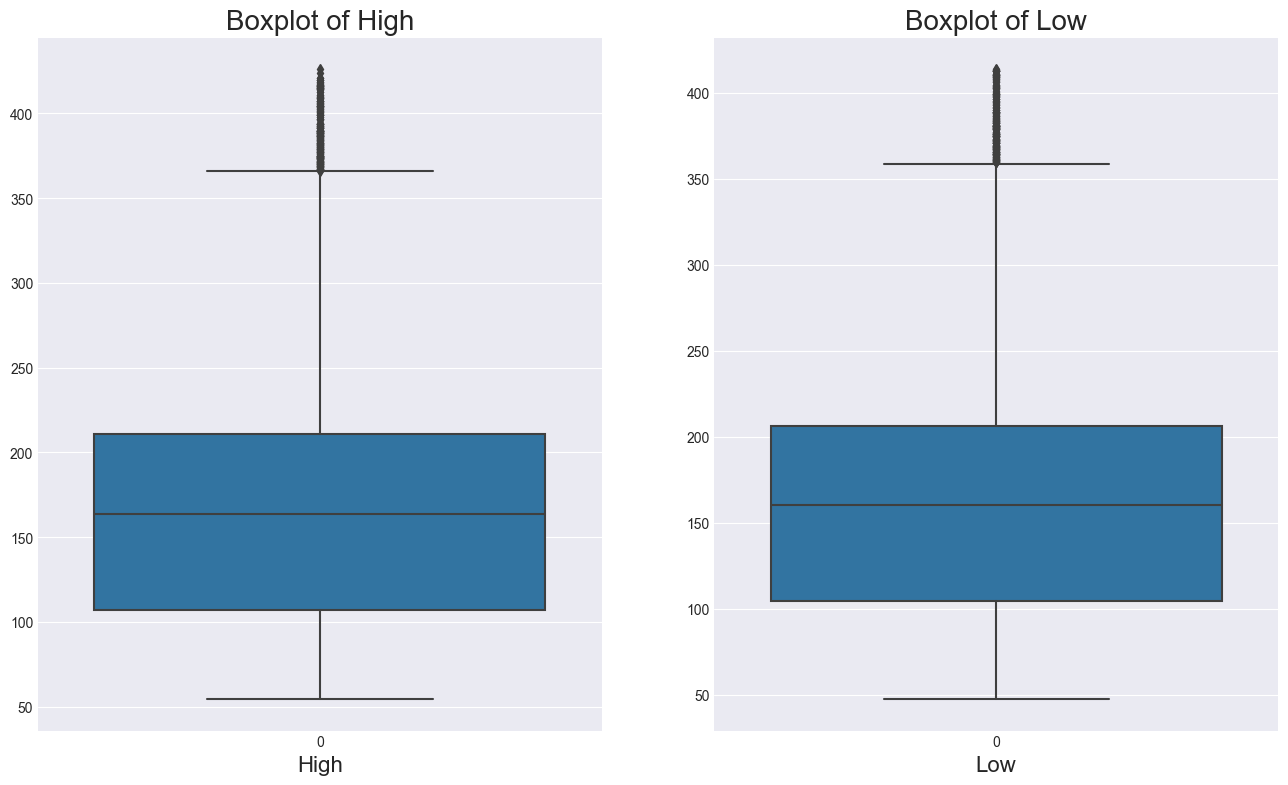

In [26]:
# Boxplots of high and low
f, ax = plt.subplots(1, 2, figsize=(16, 9))
sns.boxplot(df['High'], ax=ax[0])
sns.boxplot(df['Low'], ax=ax[1])
ax[0].set_title('Boxplot of High', fontsize=20)
ax[0].set_xlabel('High', fontsize=16)
ax[1].set_title('Boxplot of Low', fontsize=20)
ax[1].set_xlabel('Low', fontsize=16)
plt.show();

### Volume

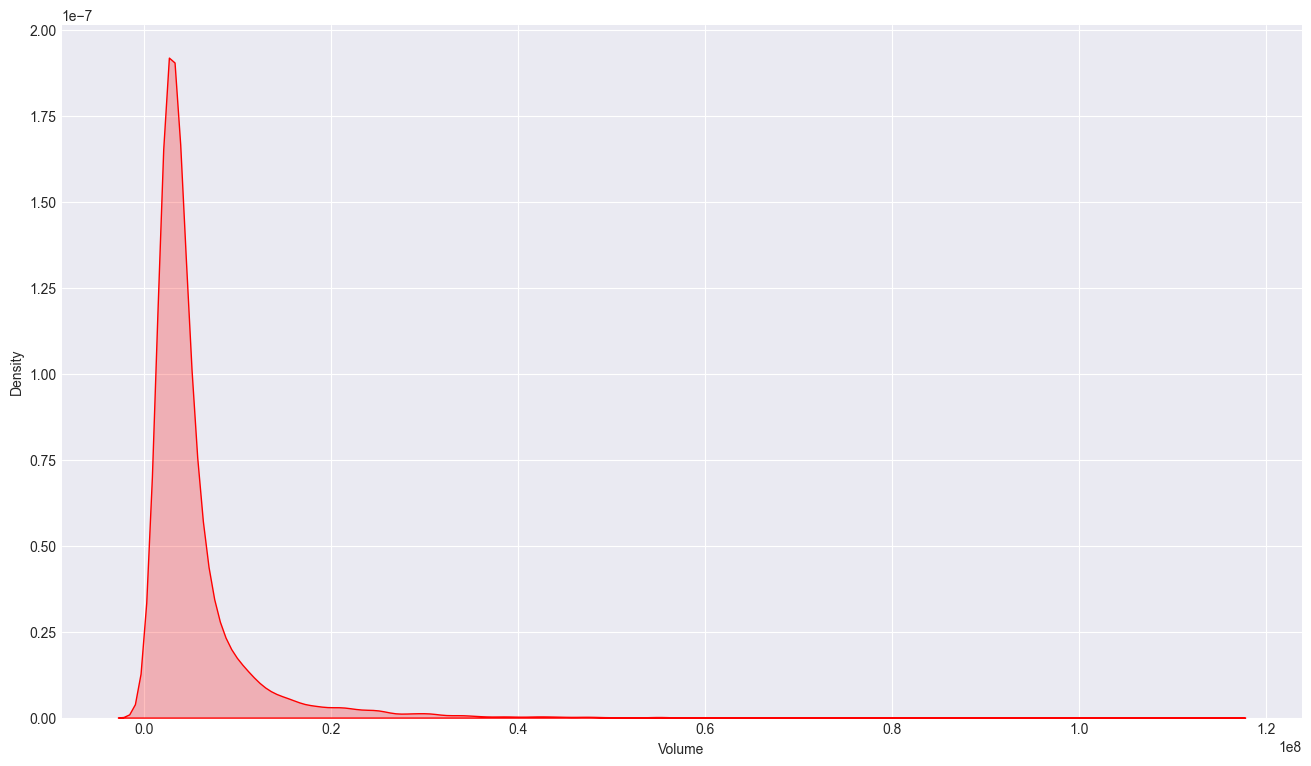

In [27]:
plt.figure(figsize=(16, 9))
sns.kdeplot(df['Volume'], shade=True, color='r');

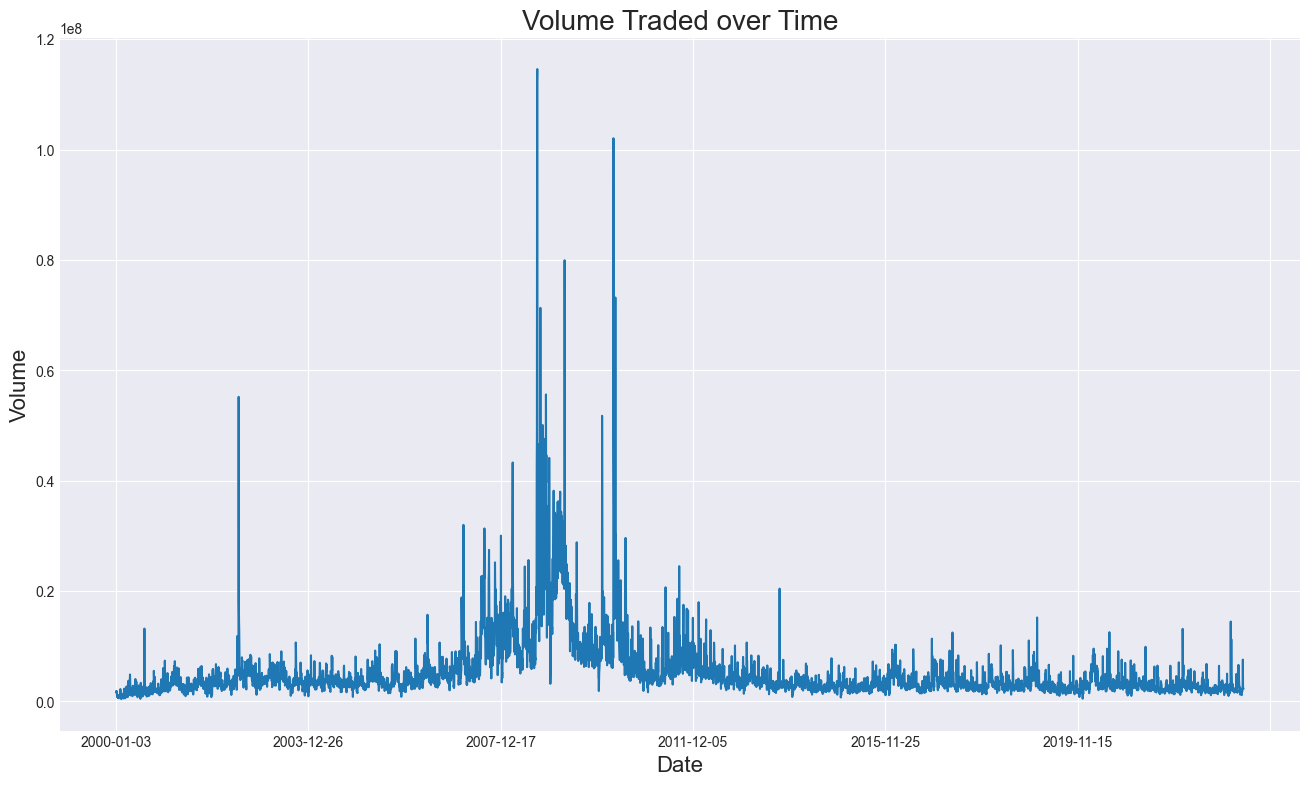

In [33]:
df['Volume'].groupby(df['Date']).sum().plot(figsize=(16, 9))
plt.title('Volume Traded over Time', fontsize=20)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Volume', fontsize=16)
plt.show();

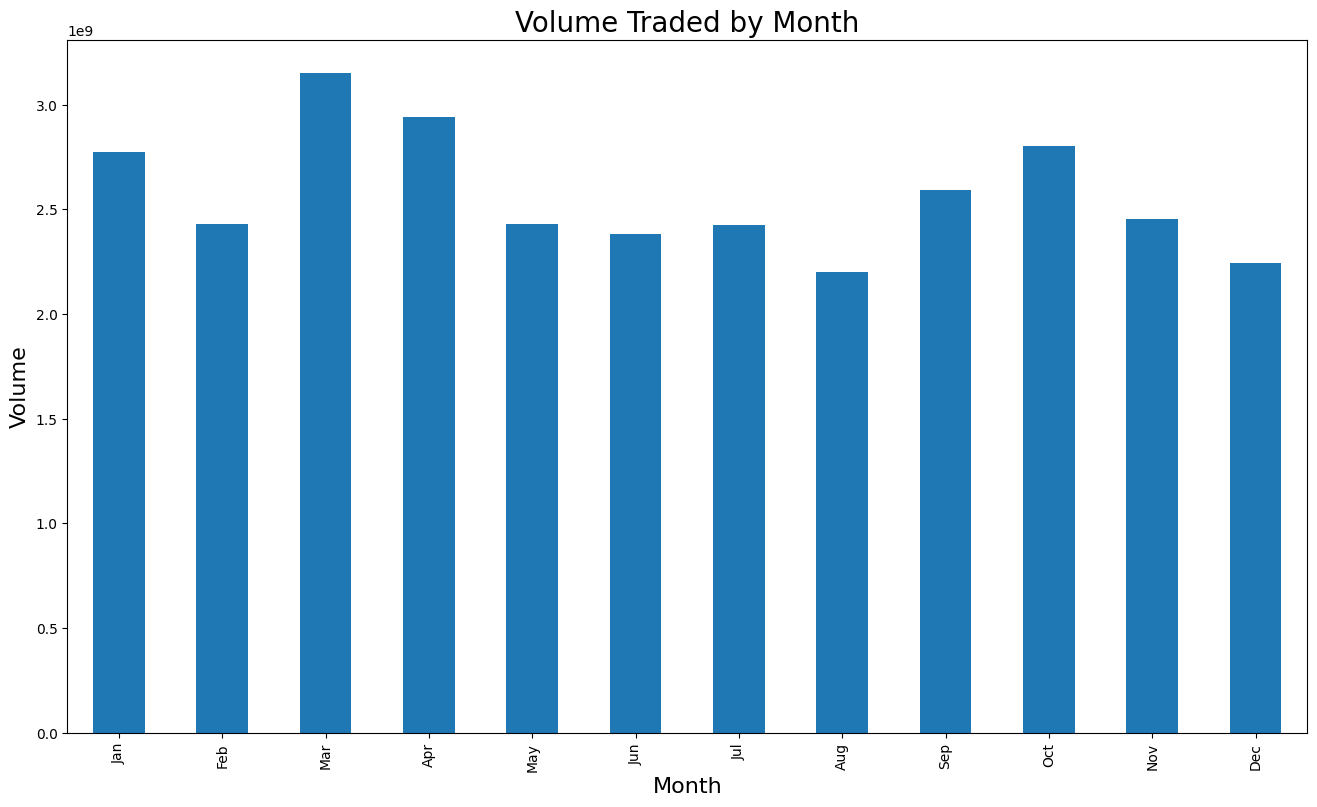

In [6]:
# Bar plot of volume traded by month
df['Date'] = pd.to_datetime(df['Date'])
df['Volume'].groupby(df['Date'].dt.month).sum().plot(kind='bar', figsize=(16, 9))
plt.title('Volume Traded by Month', fontsize=20)
plt.xticks(np.arange(12), ('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov','Dec'))
plt.xlabel('Month', fontsize=16)
plt.ylabel('Volume', fontsize=16)
plt.show();

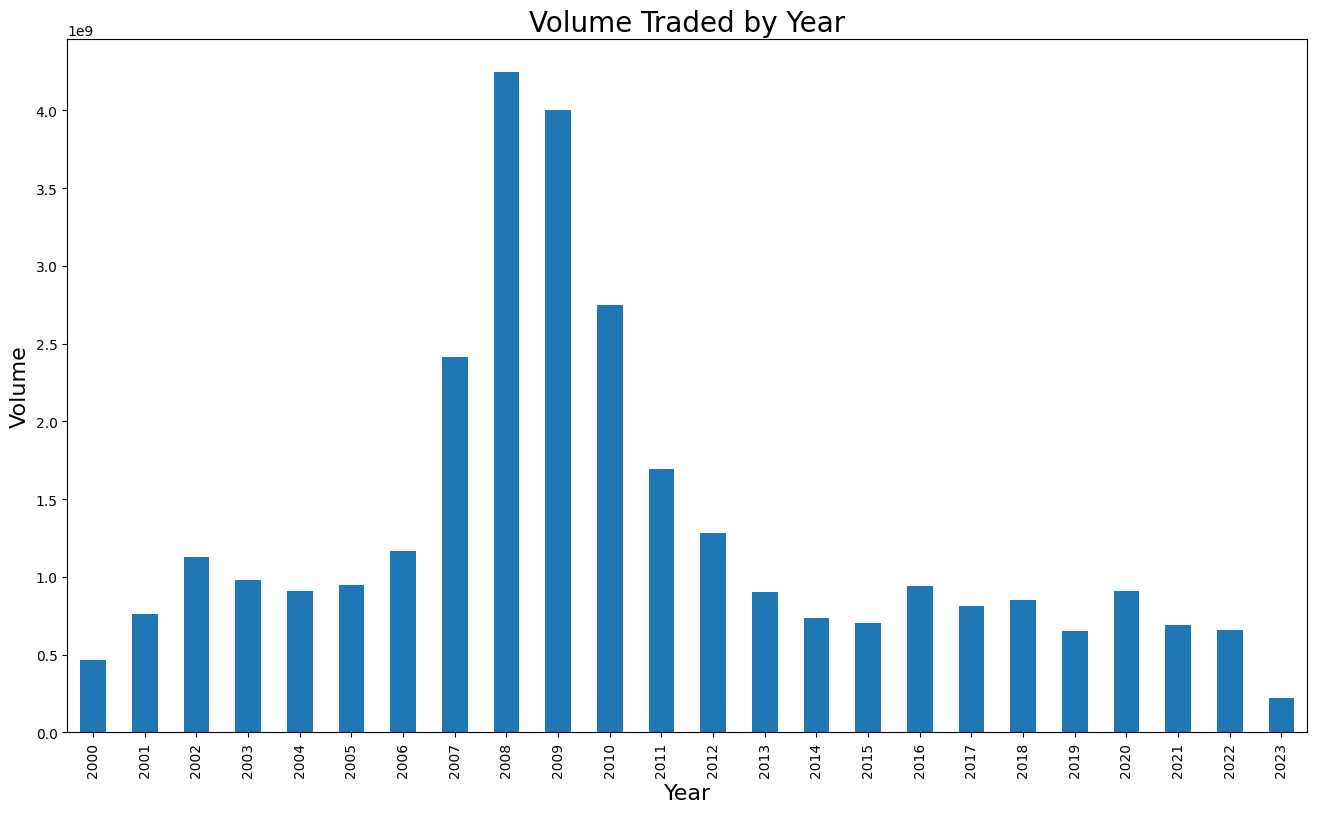

In [7]:
# Volume traded by year
df['Volume'].groupby(df['Date'].dt.year).sum().plot(kind='bar', figsize=(16, 9))
plt.title('Volume Traded by Year', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Volume', fontsize=16)
plt.show();

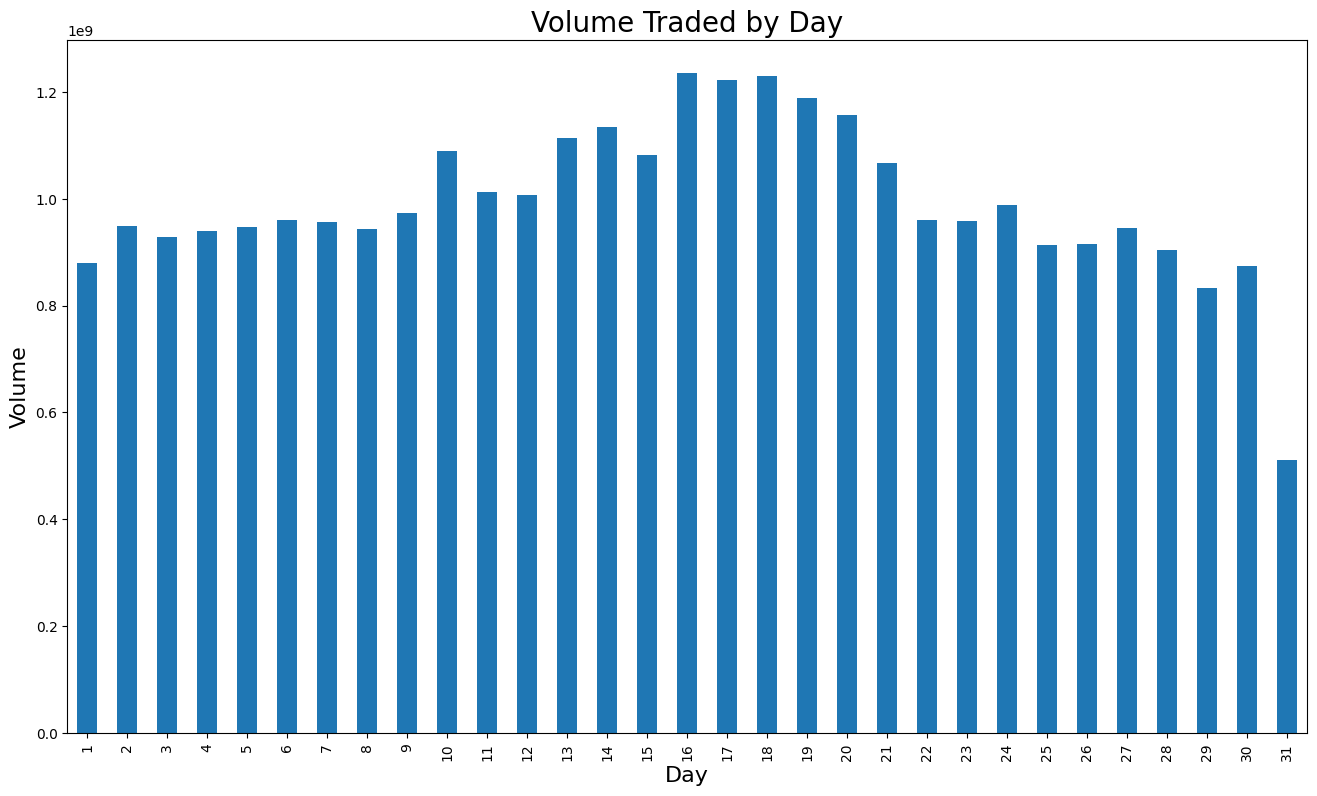

In [10]:
# Volume traded by day
df['Volume'].groupby(df['Date'].dt.day).sum().plot(kind='bar', figsize=(16, 9))
plt.title('Volume Traded by Day', fontsize=20)
#plt.xticks(np.arange(31), np.arange(1, 32))
plt.xlabel('Day', fontsize=16)
plt.ylabel('Volume', fontsize=16)
plt.show();

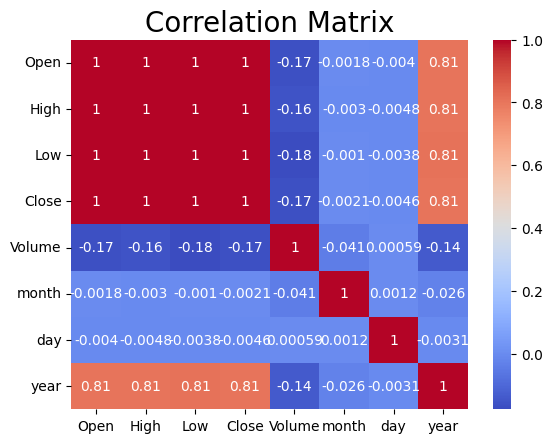

In [11]:
# Correlation matrix
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day
df['year'] = df['Date'].dt.year

sns.heatmap(df[['Open', 'High', 'Low', 'Close', 'Volume', 'month', 'day', 'year']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix', fontsize=20)
plt.show();

In [12]:
# Correlationof all features to adjusted close
df.corr()['Adj Close'].sort_values(ascending=False)

Adj Close    1.000000
Close        0.994579
High         0.994310
Low          0.994177
Open         0.993909
Date         0.833021
year         0.832919
month       -0.001108
day         -0.004586
Volume      -0.184403
Name: Adj Close, dtype: float64

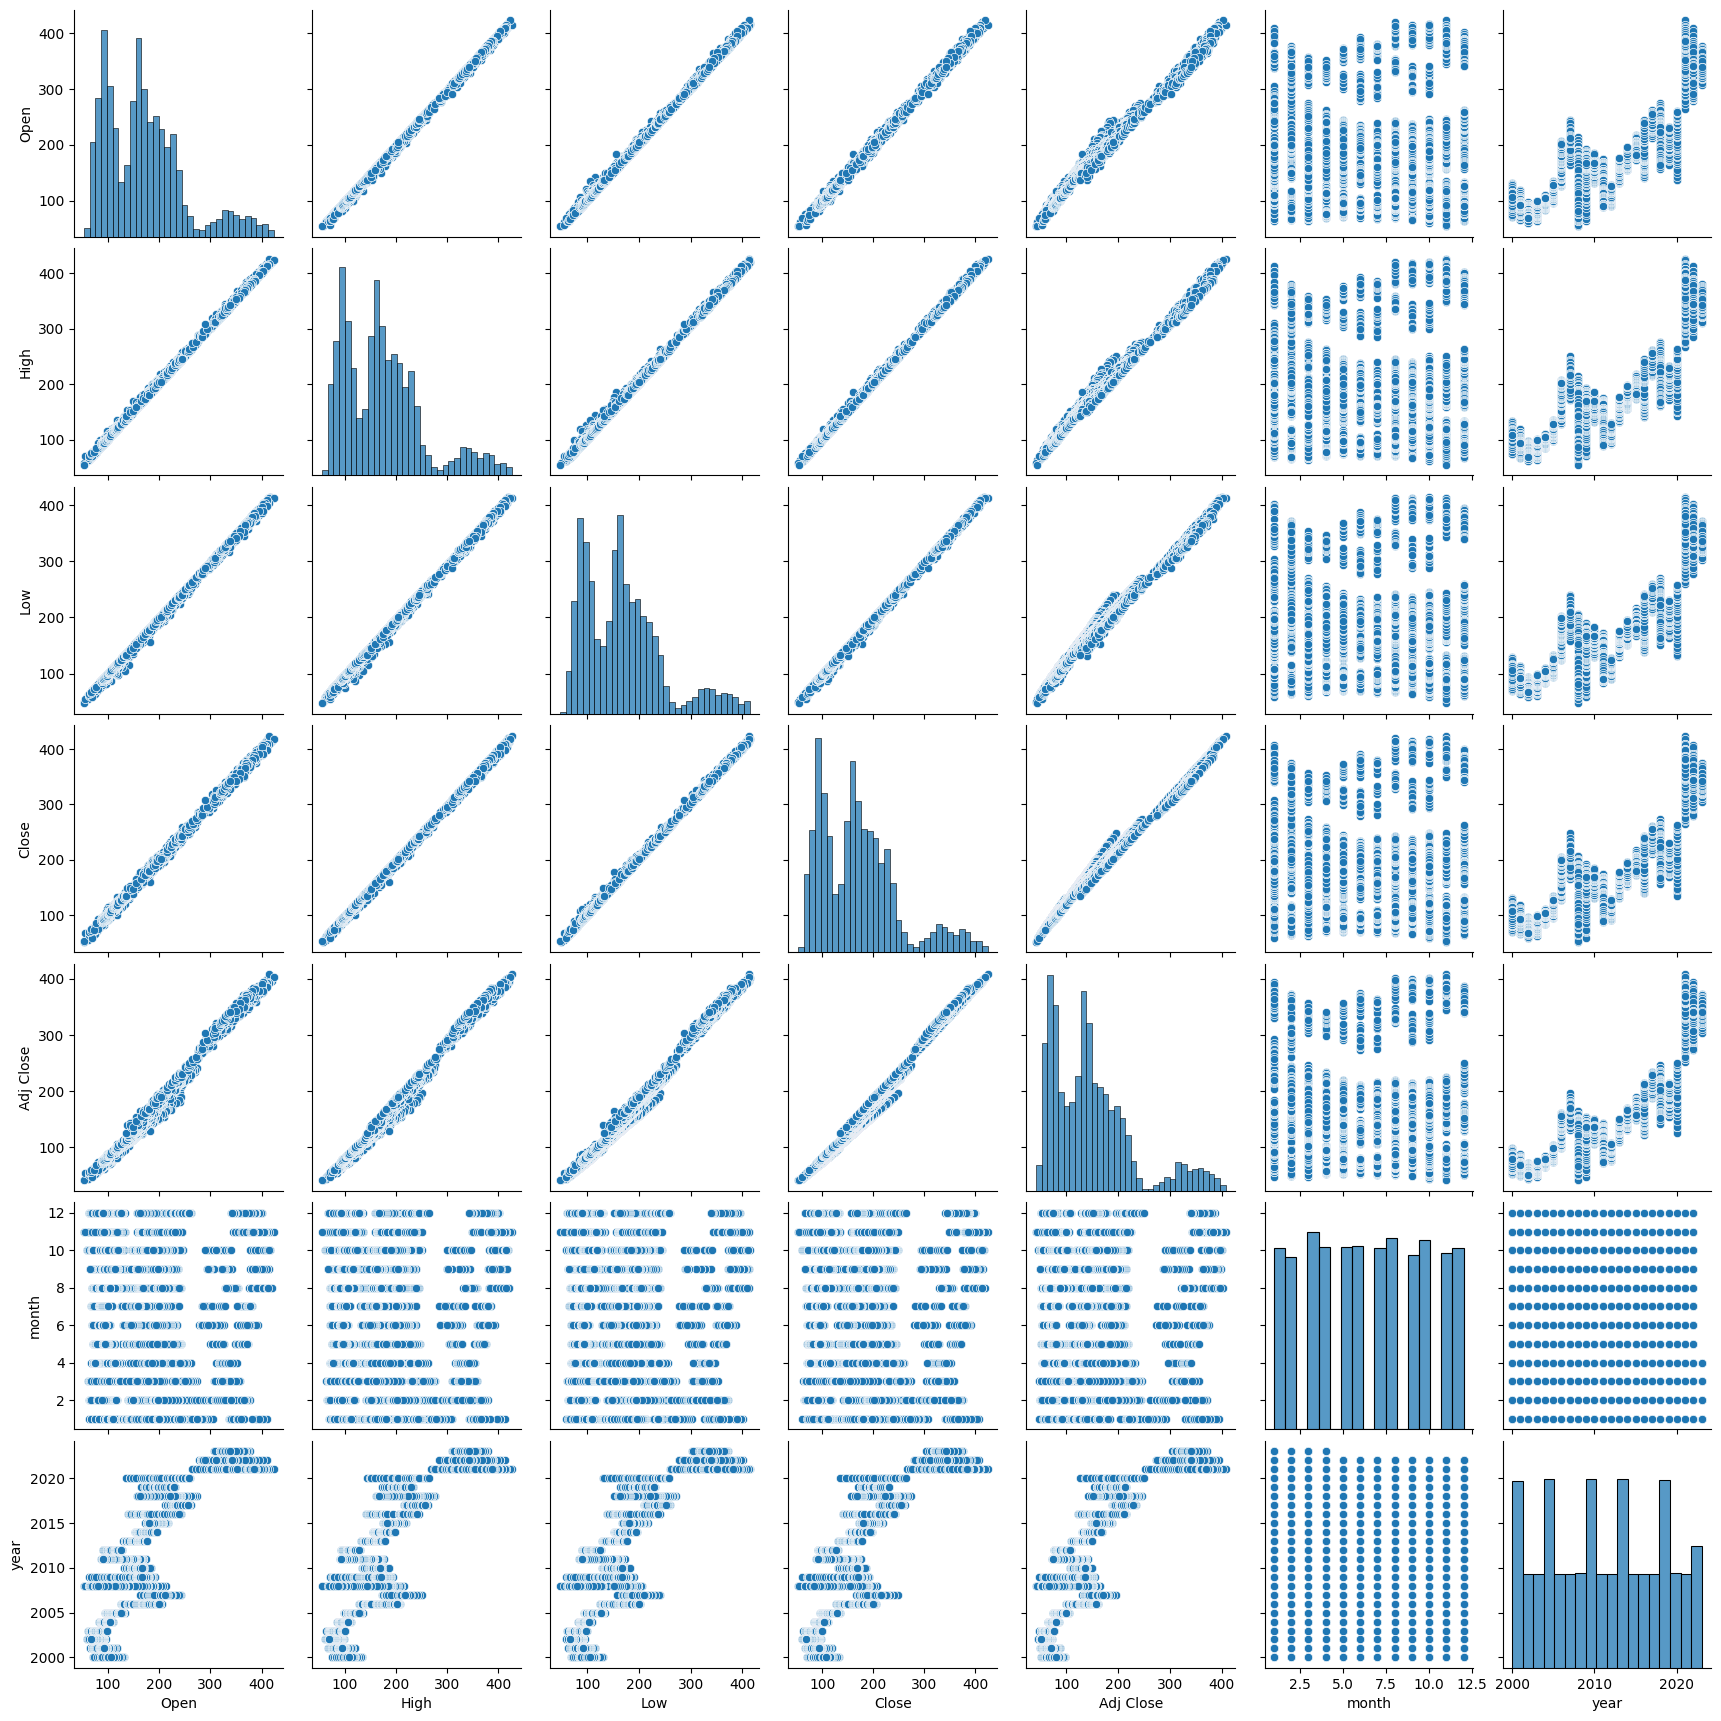

In [13]:
# Pairplot
f, ax = plt.subplots(figsize=(16, 9))
sns.pairplot(df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'month', 'year']])
plt.show();

# Modelling

Prediction of Adjusted Close: [ 48.65409716  75.11165119 364.82079719 ...  61.78514702 190.6333543
  50.10301919]
Mean Squared Error: 51.03744986805945
Mean Squared Log Error: 0.004872434755973201
Mean Absolute Error: 5.897401175521067
R^2 score: 0.9924991576321759


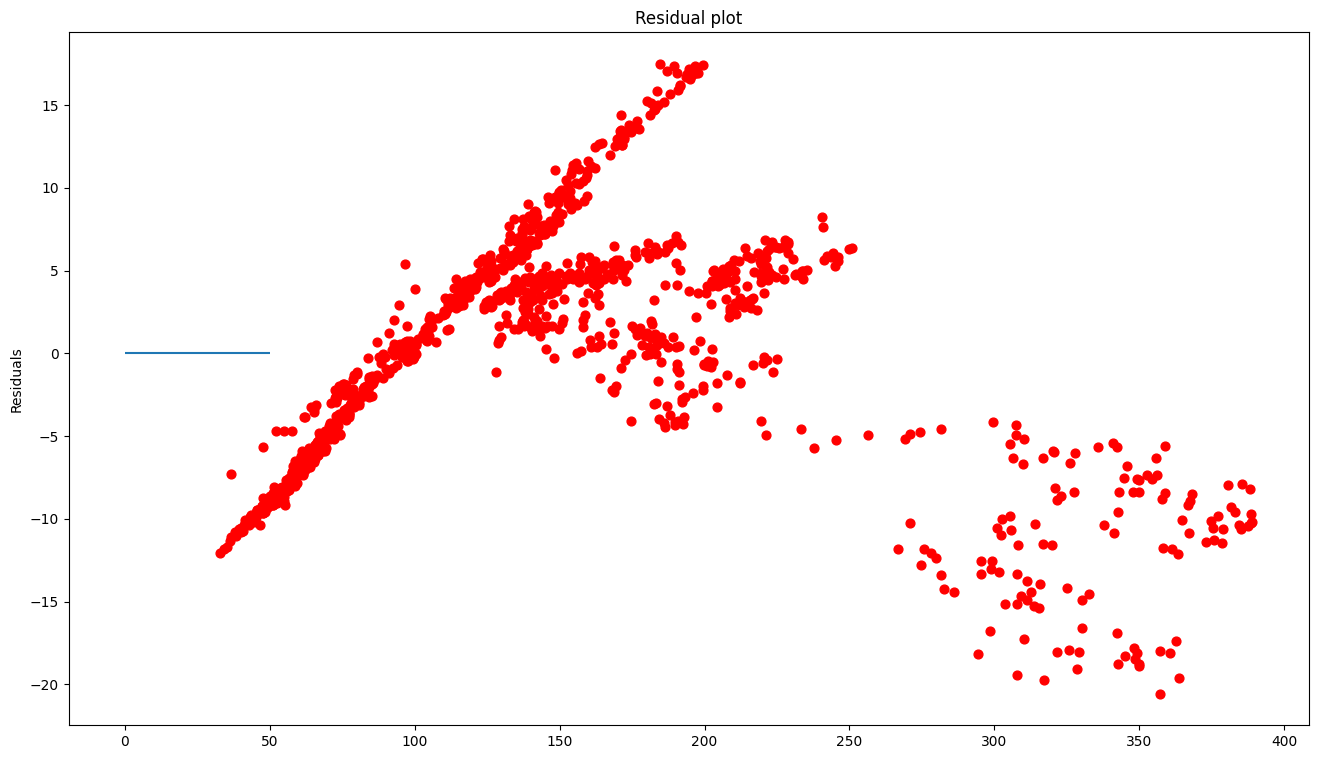

In [14]:
X = df[['Open', 'High', 'Low', 'Close', 'month', 'year']]
y = df['Adj Close']

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_squared_log_error, r2_score, mean_absolute_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

lr = LinearRegression()
lr.fit(X_train, y_train)

lr_y_pred = lr.predict(X_test)
print(f'Prediction of Adjusted Close: {lr_y_pred}')


print(f'Mean Squared Error: {mean_squared_error(y_test, lr_y_pred)}')
print(f'Mean Squared Log Error: {mean_squared_log_error(y_test, lr_y_pred)}')
print(f'Mean Absolute Error: {mean_absolute_error(y_test, lr_y_pred)}')
print(f'R^2 score: {r2_score(y_test, lr_y_pred)}')

# Plot the residuals
plt.figure(figsize=(16, 9))
plt.scatter(lr_y_pred, lr_y_pred - y_test, c='r', s=40)
plt.hlines(y=0, xmin=0, xmax=50)    
plt.title('Residual plot')
plt.ylabel('Residuals')
plt.show();

* From the residual plot, we can see that the residuals are centered around 0 and have constant variance. This is a good indication that the model is a good fit.

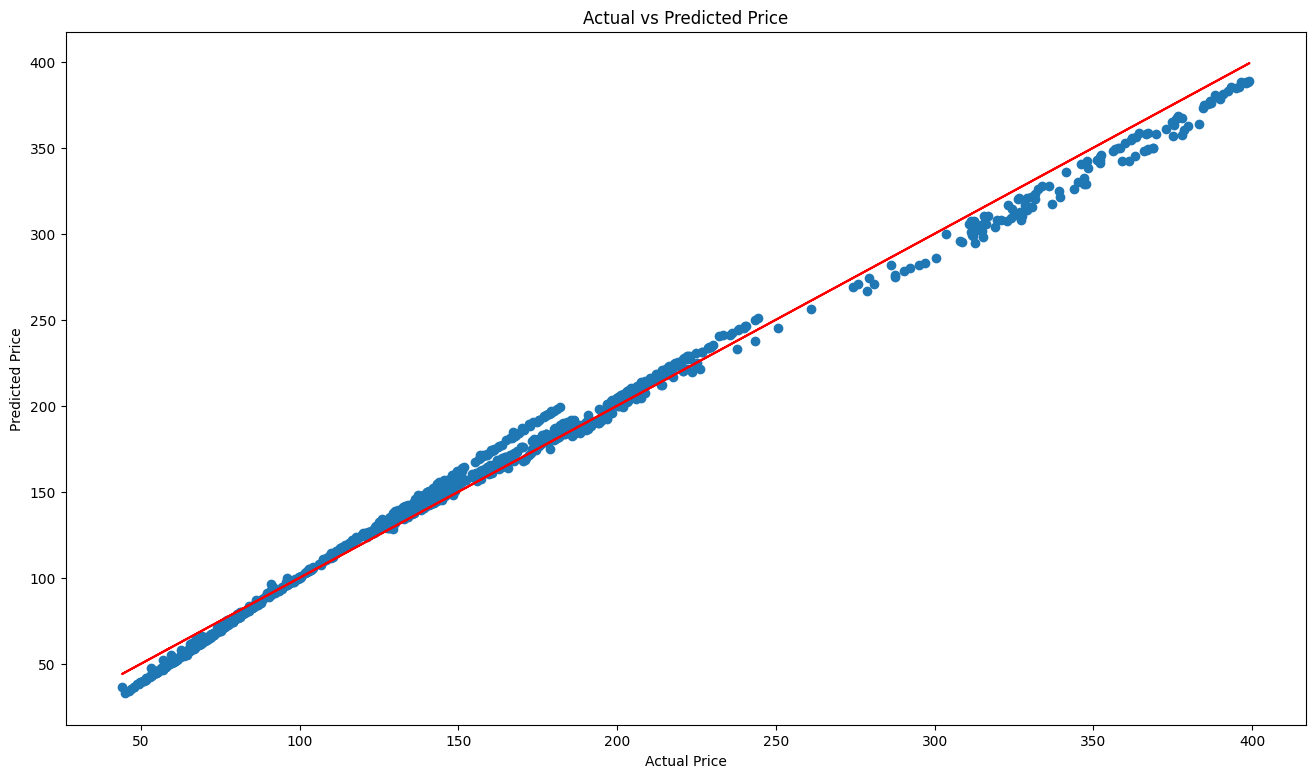

In [15]:
# Visualize the model
plt.figure(figsize=(16, 9))
plt.scatter(y_test, lr_y_pred)
plt.plot(y_test, y_test, 'r')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price')
plt.show();

* There is a line of best fit that is almost linear, which means that the model is a good fit for the data.

Prediction of Adjusted Close: [ 58.337837  77.352356 370.00543  ...  67.80215  187.7401    58.612854]
Mean Squared Error: 1.0983973629200534
Mean Squared Log Error: 3.288902504358406e-05
Mean Absolute Error: 0.5412941858301451
R^2 score: 0.9998385713726333


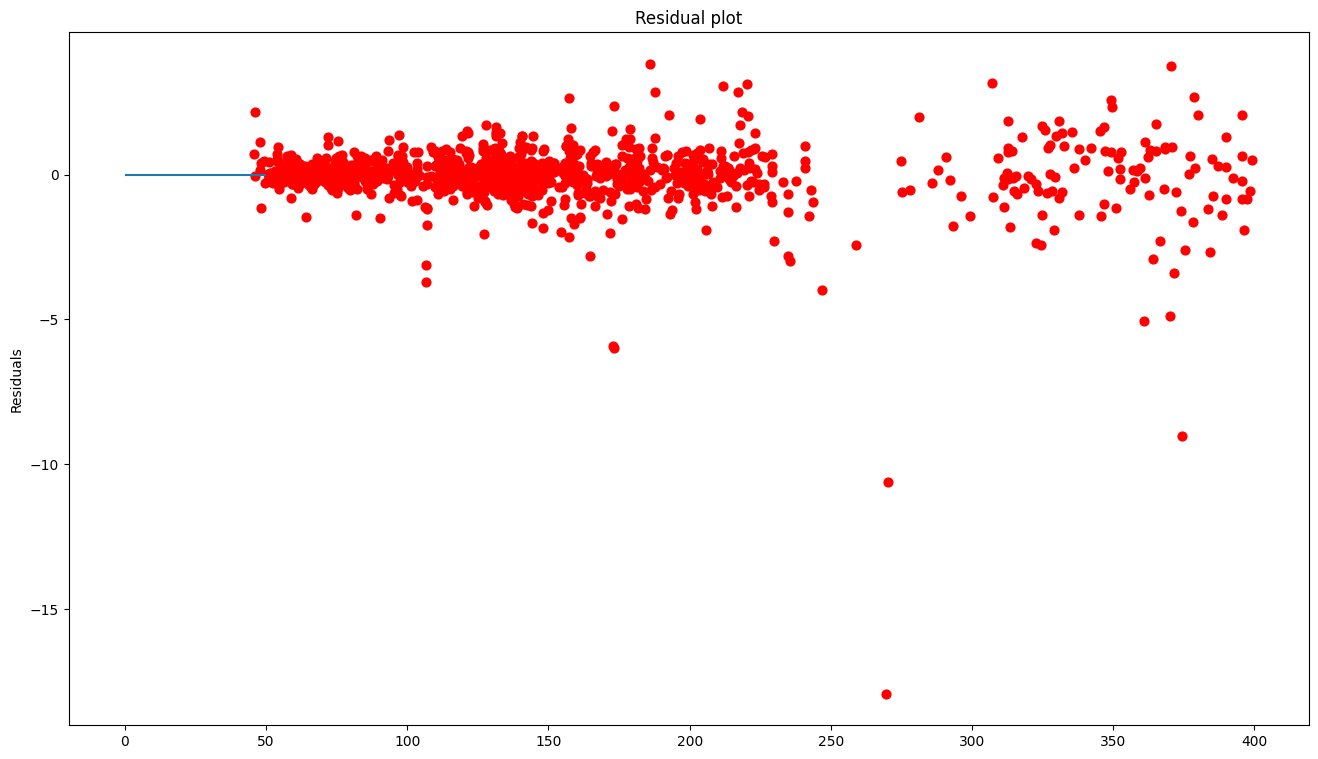

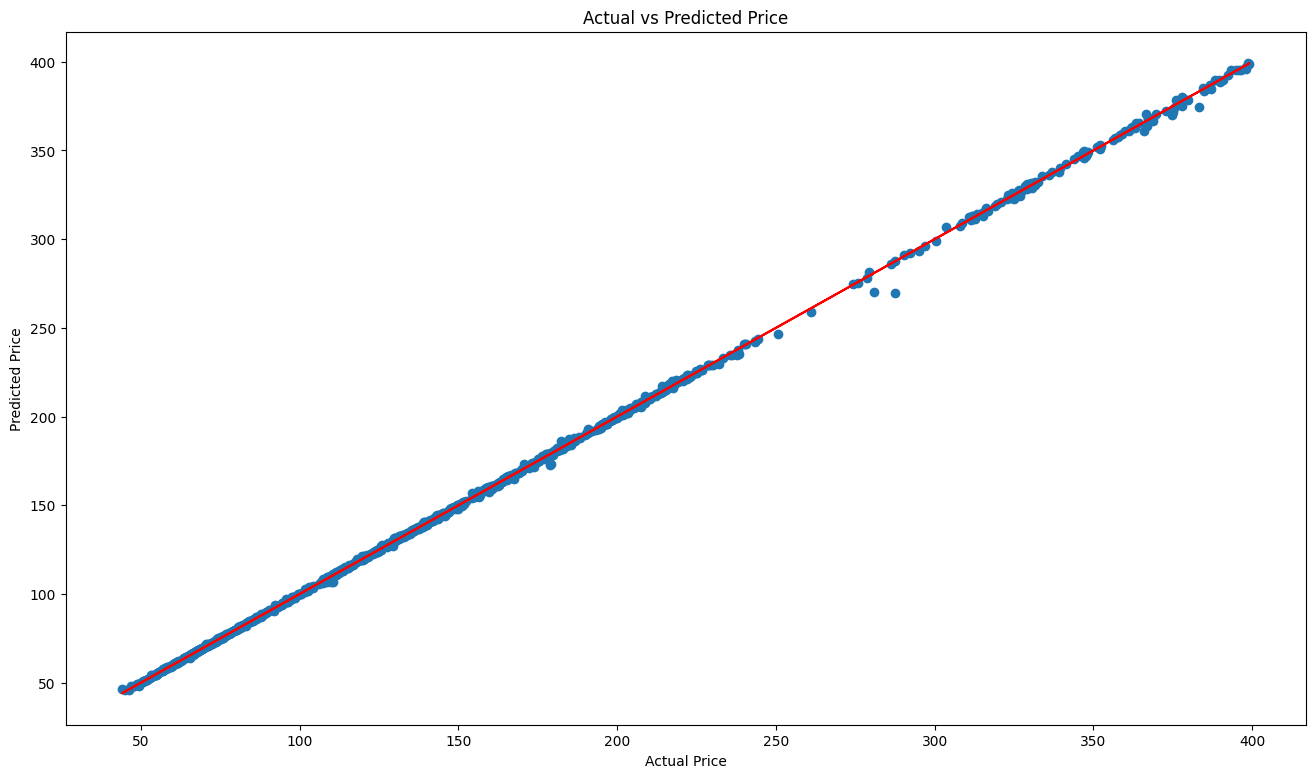

In [17]:
# XGbRegressor
from xgboost import XGBRegressor
xg = XGBRegressor()
xg.fit(X_train, y_train)

xg_y_pred = xg.predict(X_test)
print(f'Prediction of Adjusted Close: {xg_y_pred}')

print(f'Mean Squared Error: {mean_squared_error(y_test, xg_y_pred)}')
print(f'Mean Squared Log Error: {mean_squared_log_error(y_test, xg_y_pred)}')
print(f'Mean Absolute Error: {mean_absolute_error(y_test, xg_y_pred)}')
print(f'R^2 score: {r2_score(y_test, xg_y_pred)}')

# Plot the residuals
plt.figure(figsize=(16, 9))
plt.scatter(xg_y_pred, xg_y_pred - y_test, c='r', s=40)
plt.hlines(y=0, xmin=0, xmax=50)
plt.title('Residual plot')
plt.ylabel('Residuals')
plt.show();

# Visualize the model
plt.figure(figsize=(16, 9))
plt.scatter(y_test, xg_y_pred)
plt.plot(y_test, y_test, 'r')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price')
plt.show();

## Time Series Forecasting with ARIMA

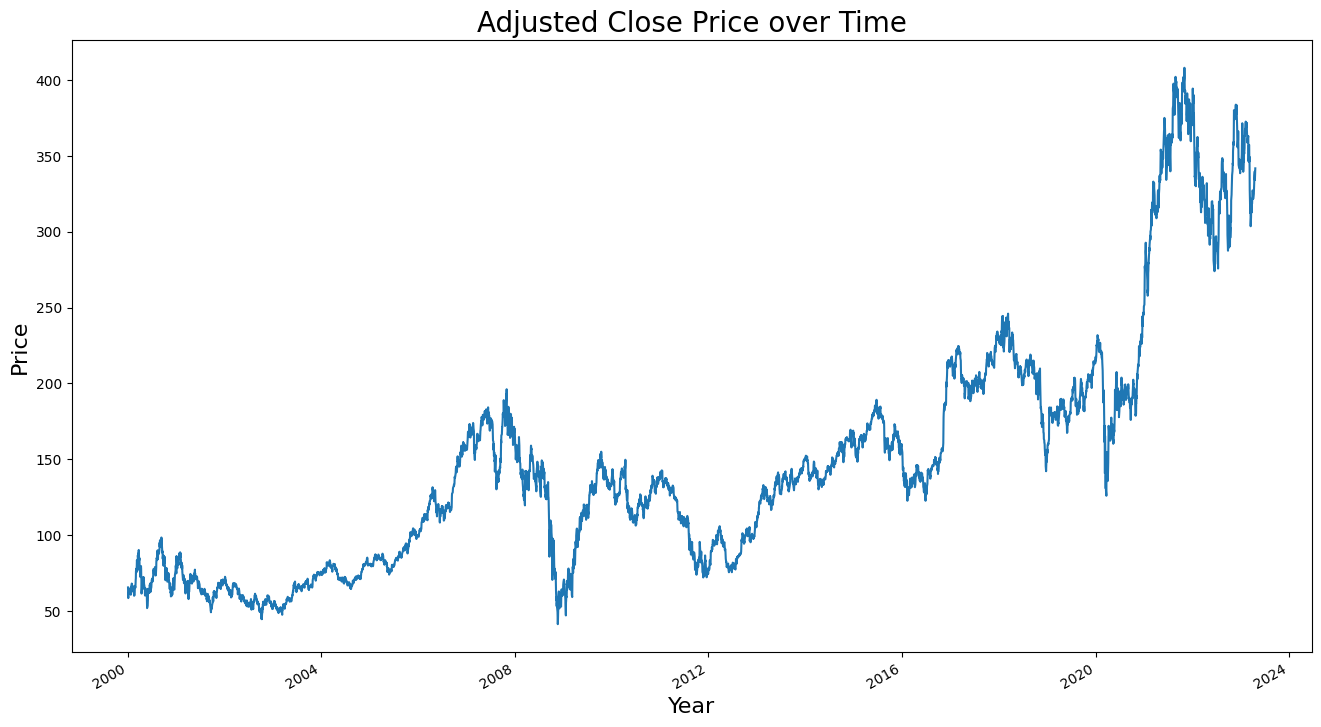

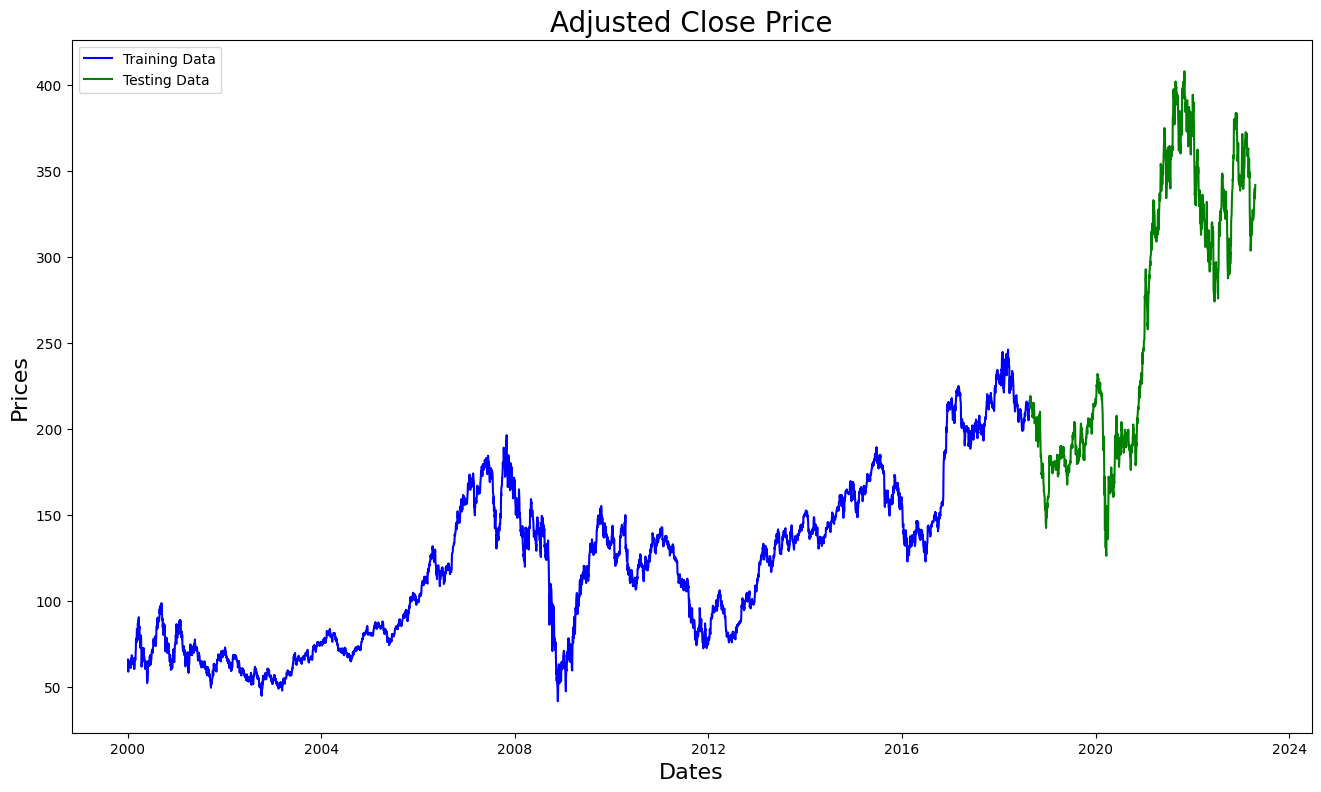

<class 'list'>
4690
MSE Error: 25.705990373834126
MSE Log Error: 0.00044857750516482737
Mean Absolute Error: 3.6799887209720206
R^2 score: 0.9958704074068726


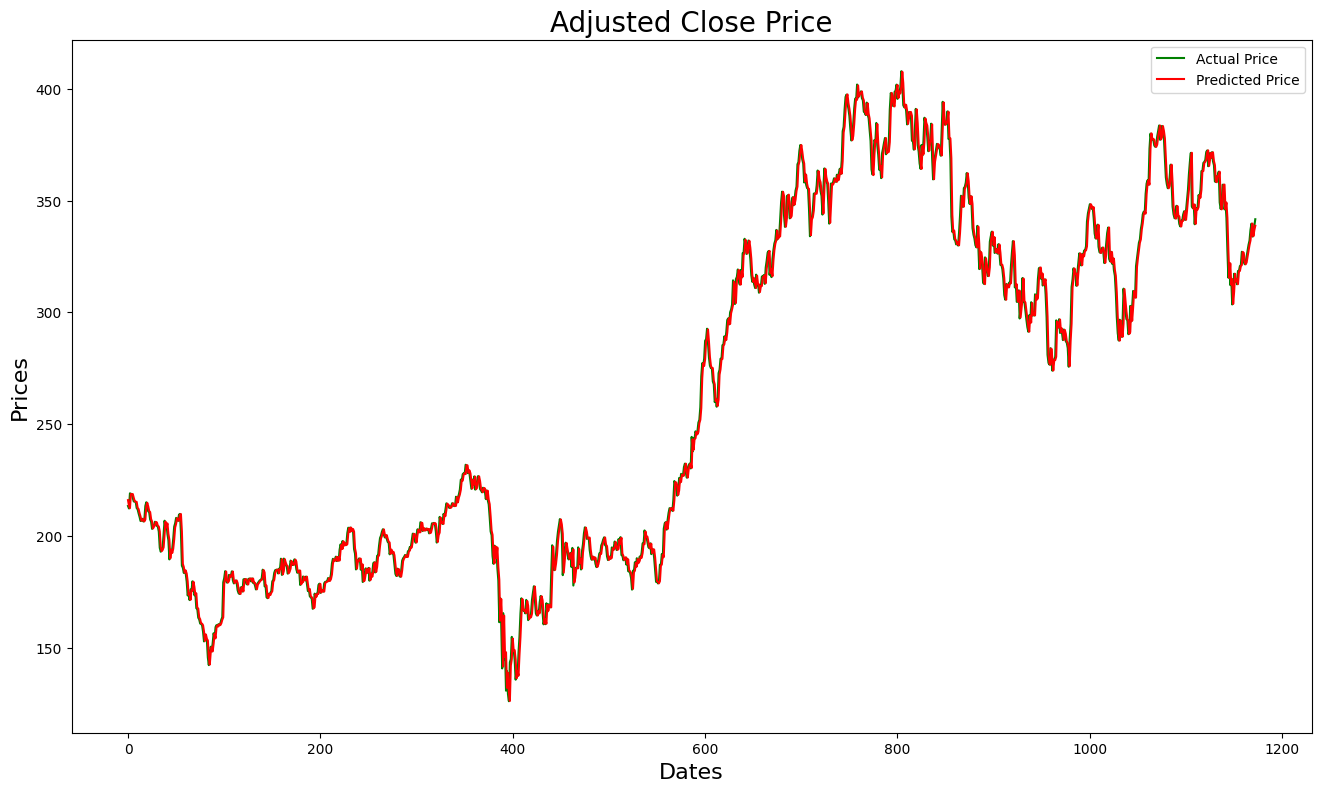

In [22]:
# ARIMA
from statsmodels.tsa.arima.model import ARIMA

df = pd.read_csv('The Goldman Sachs.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

df['Adj Close'].plot(figsize=(16, 9))
plt.title('Adjusted Close Price over Time', fontsize=20)
plt.ylabel('Price', fontsize=16)
plt.xlabel('Year', fontsize=16)
plt.show();

# Split data into train and test
train_data, test_data = df[0:int(len(df)*0.8)], df[int(len(df)*0.8):]

# Plot the data
plt.figure(figsize=(16, 9))
plt.title('Adjusted Close Price', fontsize=20)
plt.xlabel('Dates', fontsize=16)
plt.ylabel('Prices', fontsize=16)
plt.plot(train_data['Adj Close'], 'blue', label='Training Data')
plt.plot(test_data['Adj Close'], 'green', label='Testing Data')
plt.legend()
plt.show();

# ARIMA model
train_ar = train_data['Adj Close'].values
test_ar = test_data['Adj Close'].values

history = [x for x in train_ar]
print(type(history))
print(len(history))

predictions = list()
for t in range(len(test_ar)):

    model = ARIMA(history, order=(2, 1, 0))
    model.disp = 0
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]

    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)
    # since it is too long, I will comment it out
    #print('predicted=%f, expected=%f' % (yhat, obs))

# Evaluate the model
error = mean_squared_error(test_ar, predictions)
print(f'MSE Error: {error}')
print(f'MSE Log Error: {mean_squared_log_error(test_ar, predictions)}')
print(f'Mean Absolute Error: {mean_absolute_error(test_ar, predictions)}')
print(f'R^2 score: {r2_score(test_ar, predictions)}')

# Plot the results
plt.figure(figsize=(16, 9))
plt.plot(test_ar, color='green', label='Actual Price')
plt.plot(predictions, color='red', label='Predicted Price')
plt.title('Adjusted Close Price', fontsize=20)
plt.xlabel('Traded', fontsize=16)
plt.ylabel('Prices', fontsize=16)
plt.legend()
plt.show();

In [23]:
# Save the model
import pickle
pickle.dump(lr, open('lr.pkl', 'wb'))           
pickle.dump(xg, open('xg.pkl', 'wb'))
pickle.dump(model_fit, open('arima.pkl', 'wb'))

# Next steps is to build a web app using streamlit and deploy it on Heroku
* The web app will allow users to select a stock and the number of days to forecast the stock price for. The web app will then display a line chart with the forecasted stock prices.

In [ ]:
# Testing the arima model
arima_model = pickle.load(open('arima.pkl', 'rb'))

# Predict the future price
forecast = arima_model.forecast(steps=30)[0]

# Print the future price
print(f'Predicted price for the next 30 days: {forecast}')